In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
import plotly_express as px

In [2]:
## part 1 : Data Loading and Basic Analysis

#read the csv and assign the output to the variable 'socc' 
socc = pd.read_csv('sales_data_sample.csv', encoding='cp1252', skipinitialspace=True)
#print the first five
socc.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
#check for missing values in the dataset
socc.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
# Display summary statistics for the numerical columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = socc.select_dtypes(include=numerics)
newdf.describe(include='all')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [5]:
## part 2 : Data Cleaning and Preprocessing 

#Removie UnNecessary Colummn
socc.drop(columns=['ADDRESSLINE2','STATE','TERRITORY'],inplace=True,axis=1)
# Remove any rows with missing values
newdf2 =socc.dropna()
print(newdf2)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
5           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... PRODUCTCODE  \
0      2/24/2003 0:0

In [6]:
# Convert the 'Date' column to a datetime format

newdf2['ORDERDATE'] = pd.to_datetime(newdf2['ORDERDATE'])
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2747 non-null   int64         
 1   QUANTITYORDERED   2747 non-null   int64         
 2   PRICEEACH         2747 non-null   float64       
 3   ORDERLINENUMBER   2747 non-null   int64         
 4   SALES             2747 non-null   float64       
 5   ORDERDATE         2747 non-null   datetime64[ns]
 6   STATUS            2747 non-null   object        
 7   QTR_ID            2747 non-null   int64         
 8   MONTH_ID          2747 non-null   int64         
 9   YEAR_ID           2747 non-null   int64         
 10  PRODUCTLINE       2747 non-null   object        
 11  MSRP              2747 non-null   int64         
 12  PRODUCTCODE       2747 non-null   object        
 13  CUSTOMERNAME      2747 non-null   object        
 14  PHONE             2747 non-nu

C:\Users\Jullanar Sh\AppData\Local\Temp\ipykernel_7492\3407029448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['ORDERDATE'] = pd.to_datetime(newdf2['ORDERDATE'])


In [7]:
# Creat a new column ' Month '

newdf2['Month'] = newdf2['ORDERDATE'].dt.month_name()
print(newdf2['Month'])

0       February
1            May
2           July
3         August
5        October
          ...   
2818    December
2819     January
2820       March
2821       March
2822         May
Name: Month, Length: 2747, dtype: object


C:\Users\Jullanar Sh\AppData\Local\Temp\ipykernel_7492\2760238272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf2['Month'] = newdf2['ORDERDATE'].dt.month_name()


In [8]:
## part 3 : Exploratory Data Analysis

#A bar plot showing the distribution of products across different countries 

quarter = newdf2.groupby(['PRODUCTLINE']).COUNTRY.value_counts().reset_index(name='COUNTS')
quarter

,PRODUCTLINE,COUNTRY,COUNTS
0,Classic Cars,USA,311
1,Classic Cars,Spain,120
2,Classic Cars,France,98
3,Classic Cars,Australia,53
4,Classic Cars,UK,46
...,...,...,...
111,Vintage Cars,Japan,9
112,Vintage Cars,Denmark,7
113,Vintage Cars,Finland,7
114,Vintage Cars,Philippines,1


In [9]:
r1 = quarter.groupby('COUNTRY').sum()
r1

,PRODUCTLINE,COUNTS
COUNTRY,,
Australia,Classic CarsMotorcyclesPlanesShipsTrainsTrucks...,185
Austria,Classic CarsMotorcyclesPlanesShipsTrucks and B...,55
Belgium,Classic CarsPlanesShipsTrainsVintage Cars,33
Canada,Classic CarsMotorcyclesPlanesShipsTrucks and B...,70
Denmark,Classic CarsPlanesShipsTrainsTrucks and BusesV...,63
Finland,Classic CarsMotorcyclesPlanesShipsTrainsTrucks...,92
France,Classic CarsMotorcyclesPlanesShipsTrainsTrucks...,314
Germany,Classic CarsMotorcyclesPlanesShipsTrainsTrucks...,62
Ireland,Classic CarsMotorcyclesPlanesTrainsTrucks and ...,16


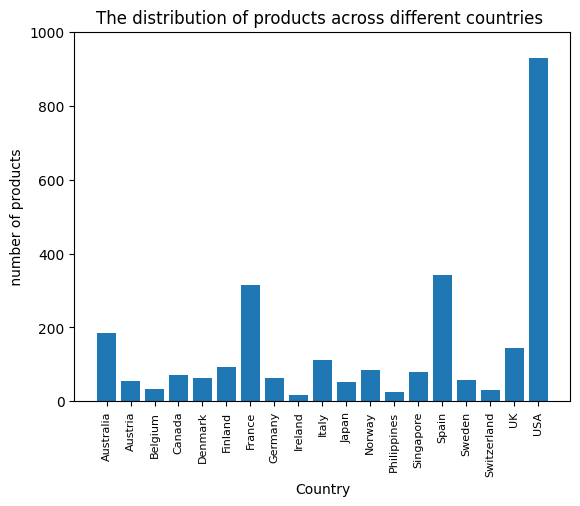

In [10]:
#A bar plot showing the distribution of products across different countries 
countries = [COUNTRY for COUNTRY, df in quarter.groupby('COUNTRY')]
plt.bar(countries, r1[ "COUNTS" ])
plt.xticks(countries, rotation='vertical',size = 8)

labels, location = plt.yticks()
plt.yticks(labels, (labels). astype(int))
plt.title("The distribution of products across different countries ")
plt.ylabel ( " number of products ")

plt.xlabel ( "Country" )
plt.show()

In [11]:
#plot the total sales amount over time ( monthly)

monthly_sales = newdf2.groupby(['Month'])['SALES'].sum().sort_values(ascending=True).reset_index()
monthly_sales.head(15)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
 
monthly_sales1=monthly_sales.sort_values( "Month", key = lambda x : pd.Categorical(x, categories=new_order, ordered=True))

 
monthly_sales1.head(15)

,Month,SALES
8,January,761985.12
7,February,756238.28
6,March,735805.81
5,April,669390.96
9,May,923972.56
0,June,454756.78
1,July,514875.97
4,August,659310.57
2,September,584724.27
10,October,1001377.20


C:\Users\Jullanar Sh\AppData\Local\Temp\ipykernel_7492\1952050860.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  a= sb.lineplot(x='Month',y='SALES',data=monthly_sales1,palette='dark',errorbar=None,)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


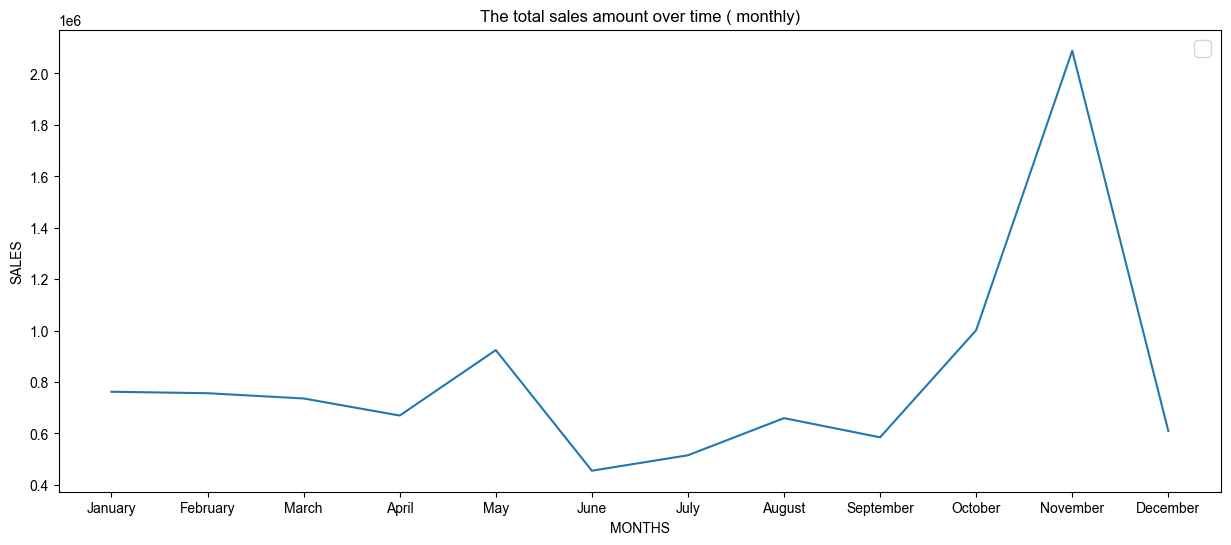

In [12]:
# Set the width and height of the figure
plt.figure(figsize=(15,6))

plt.title("The total sales amount over time ( monthly)") # add title

a= sb.lineplot(x='Month',y='SALES',data=monthly_sales1,palette='dark',errorbar=None,)
sb.set_style('whitegrid') # add white grid behind

plt.xlabel('MONTHS')
plt.ylabel('SALES')
plt.legend(prop={'size': 15})  # adjust the legend size


<Figure size 640x500 with 0 Axes>

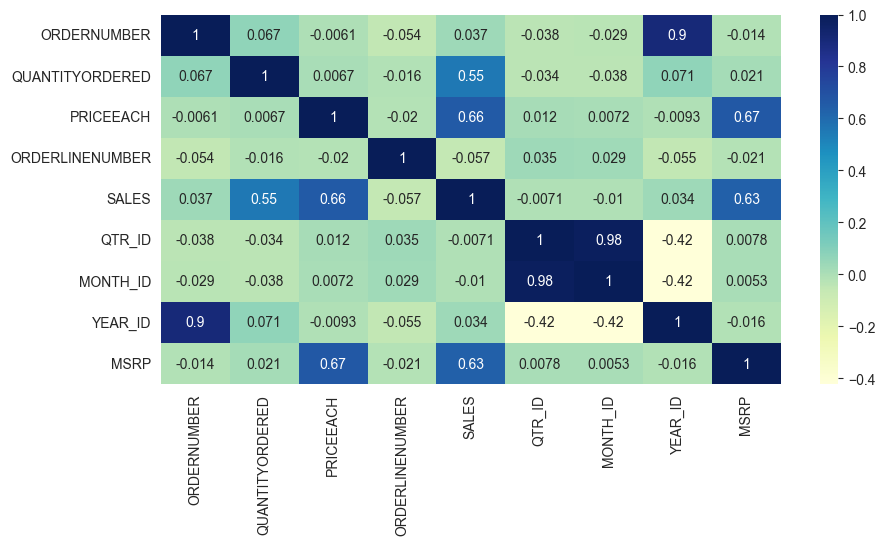

In [13]:
# generate a heatmap to visualize correlation matrix of numerical variables

plt.figure().set_figheight(5)
plt.figure().set_figwidth(10)
nudf = newdf2.select_dtypes(include=numerics)
sb.heatmap(nudf.corr(), cmap='YlGnBu' , annot=True)
plt.show()

In [14]:
##part 4 : Data Aggregation and Grouping

#The total sales amount for each product country
sales = newdf2.set_index('COUNTRY')
sales.groupby('COUNTRY')['SALES'].sum()

COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3355575.69
Name: SALES, dtype: float64

In [15]:
#find the product that generated the highest total revenue 

# Group The Data By Product.
grouped_data = newdf2.groupby(['PRODUCTLINE']).agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum',
    'PRICEEACH': 'mean',
    'ORDERNUMBER': 'count'
}).reset_index()

# Rename The Columns.
grouped_data = grouped_data.rename(columns={
    'SALES': 'Total Revenue Generated',
    'QUANTITYORDERED': 'Total Units Sold',
    'PRICEEACH': 'Average Price Per Unit',
    'ORDERNUMBER': 'Total Number of Orders'
})

In [16]:
# Sort The Data By Revenue in Ascending Order.
grouped_data = grouped_data.sort_values('Total Revenue Generated', ascending=False)
print(grouped_data.to_string(index=False))

     PRODUCTLINE  Total Revenue Generated  Total Units Sold  Average Price Per Unit  Total Number of Orders
    Classic Cars               3842868.54             33373               87.288325                     949
    Vintage Cars               1806675.68             20059               78.005769                     579
Trucks and Buses               1111559.19             10579               87.749627                     295
     Motorcycles               1103512.19             11080               82.848083                     313
          Planes                969323.42             10636               81.861250                     304
           Ships                700039.22              7989               83.708391                     230
          Trains                226243.47              2712               75.654675                      77


In [17]:
#print the product that generated the highest total revenue 
grouped_data.head(1)

,PRODUCTLINE,Total Revenue Generated,Total Units Sold,Average Price Per Unit,Total Number of Orders
0,Classic Cars,3842868.54,33373,87.288325,949


In [18]:
# the data grouping by month and country
 
print( newdf2.groupby(['COUNTRY','Month']).aggregate({'PRICEEACH':'mean', 'QUANTITYORDERED': 'sum'}))


                     PRICEEACH  QUANTITYORDERED
COUNTRY   Month                                
Australia April      84.979333              525
          December   79.616429              429
          February   85.331429              706
          January    86.318889              256
          July       89.511429              734
...                        ...              ...
USA       March      85.652769             2335
          May        84.063176             3008
          November   84.514924             6805
          October    83.678353             2956
          September  81.097727             1490

[120 rows x 2 columns]


<Axes: title={'center': 'PRICEEACH'}, xlabel='COUNTRY'>

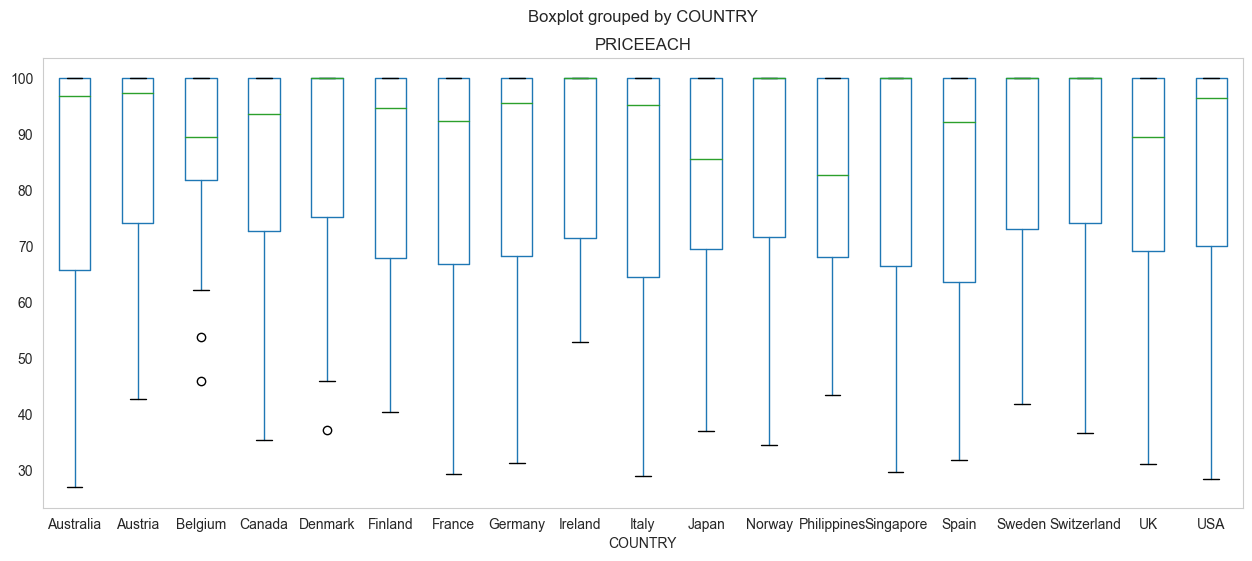

In [19]:
## part 5 : Data Visualixation 

# A box plot comparing the distribution of prices across different product countries 
newdf2.boxplot(by='COUNTRY' , column=['PRICEEACH'], grid=False,figsize=(15,6)) 

<Axes: xlabel='Total Revenue Generated', ylabel='Total Units Sold'>

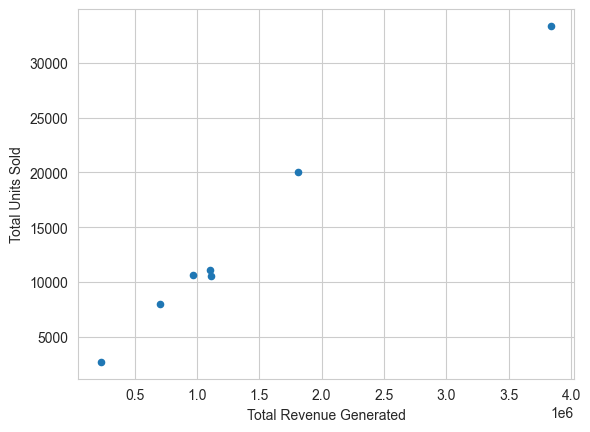

In [21]:
# A scatter plot to explore the relationships between total sales and quantity sold 
grouped_data.plot.scatter(x='Total Revenue Generated' , y='Total Units Sold')

c:\Users\Jullanar Sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


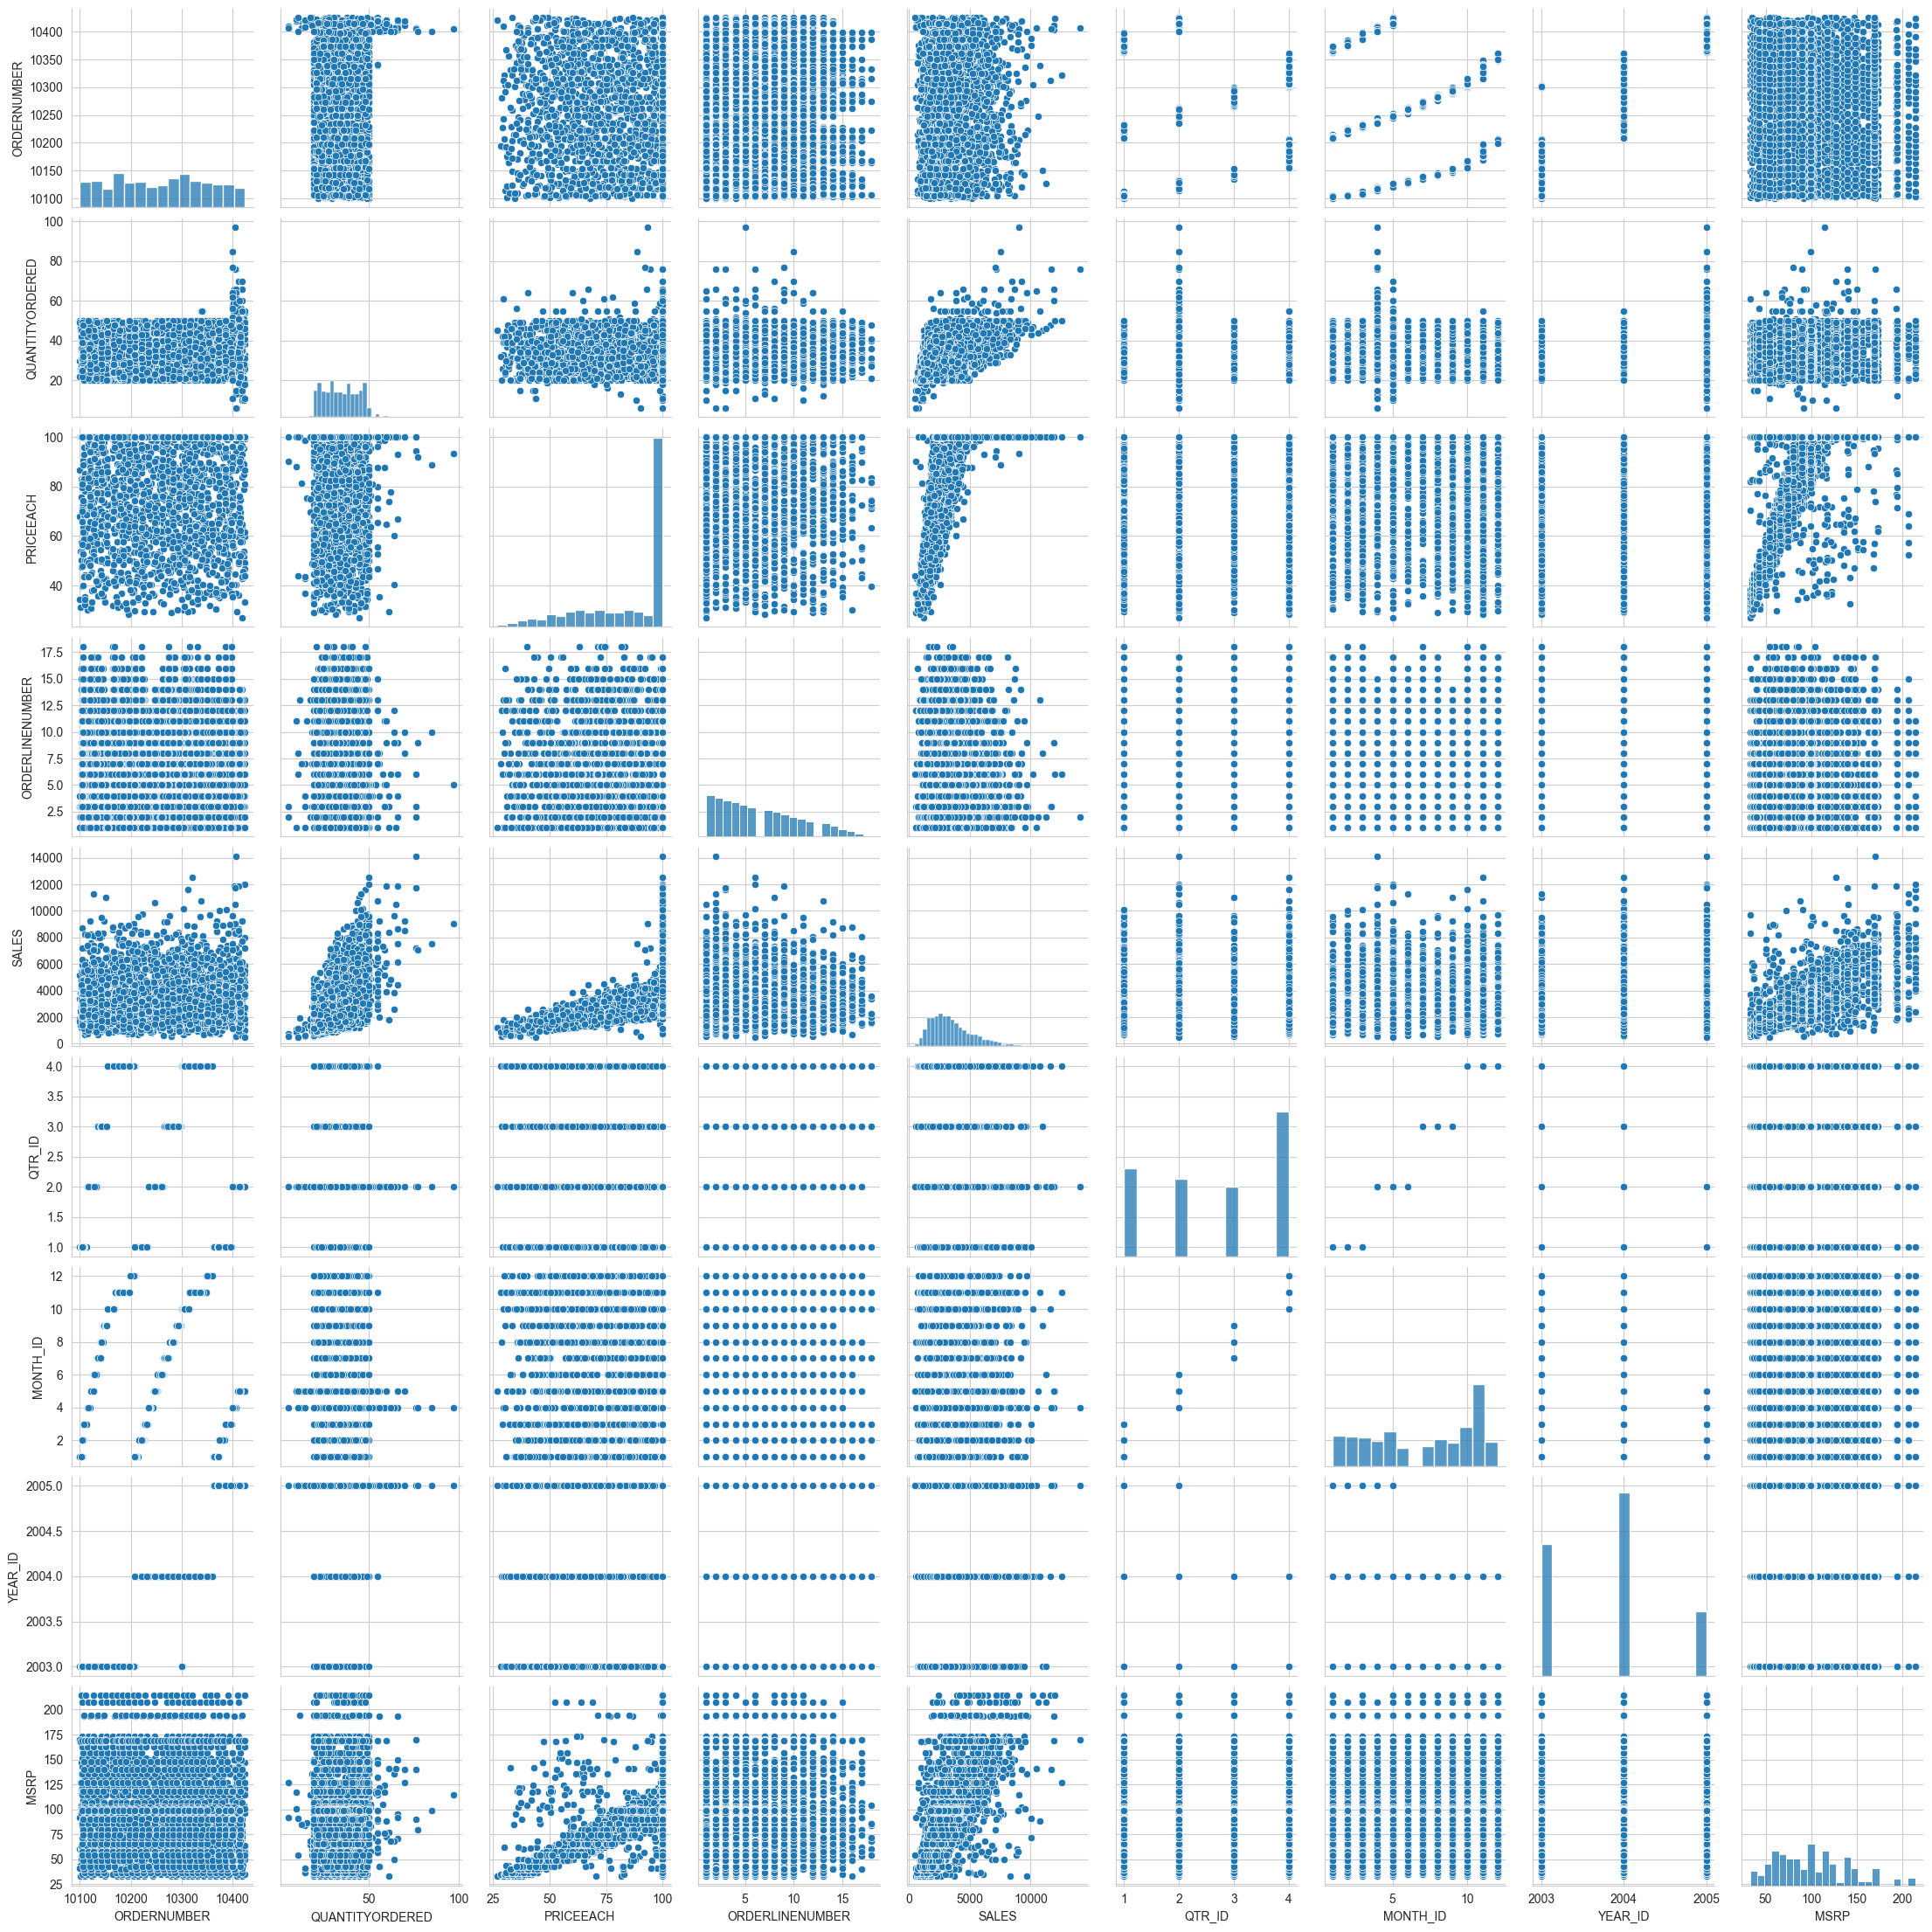

In [22]:
## Part 6 : Advanced Visualization 
# A pair plot to visualization the relationships between numerical variables 
sb.pairplot(nudf)
plt.show()

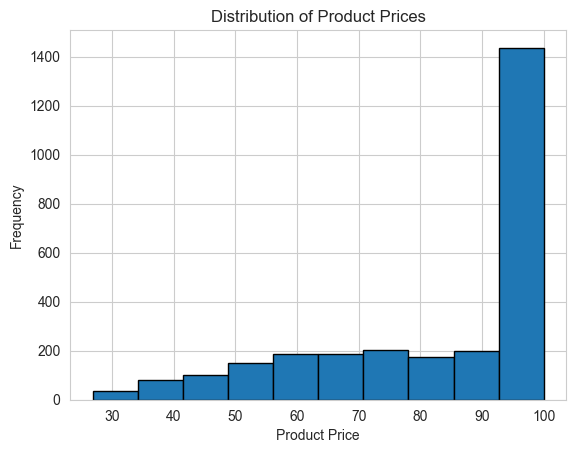

In [23]:
## part 8 :
#create a histogram to visualize the distribution of product prices
product_prices = newdf2['PRICEEACH']
plt.hist(product_prices, bins=10, edgecolor='black')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.show()

Text(0, 0.5, 'Total sales amount')

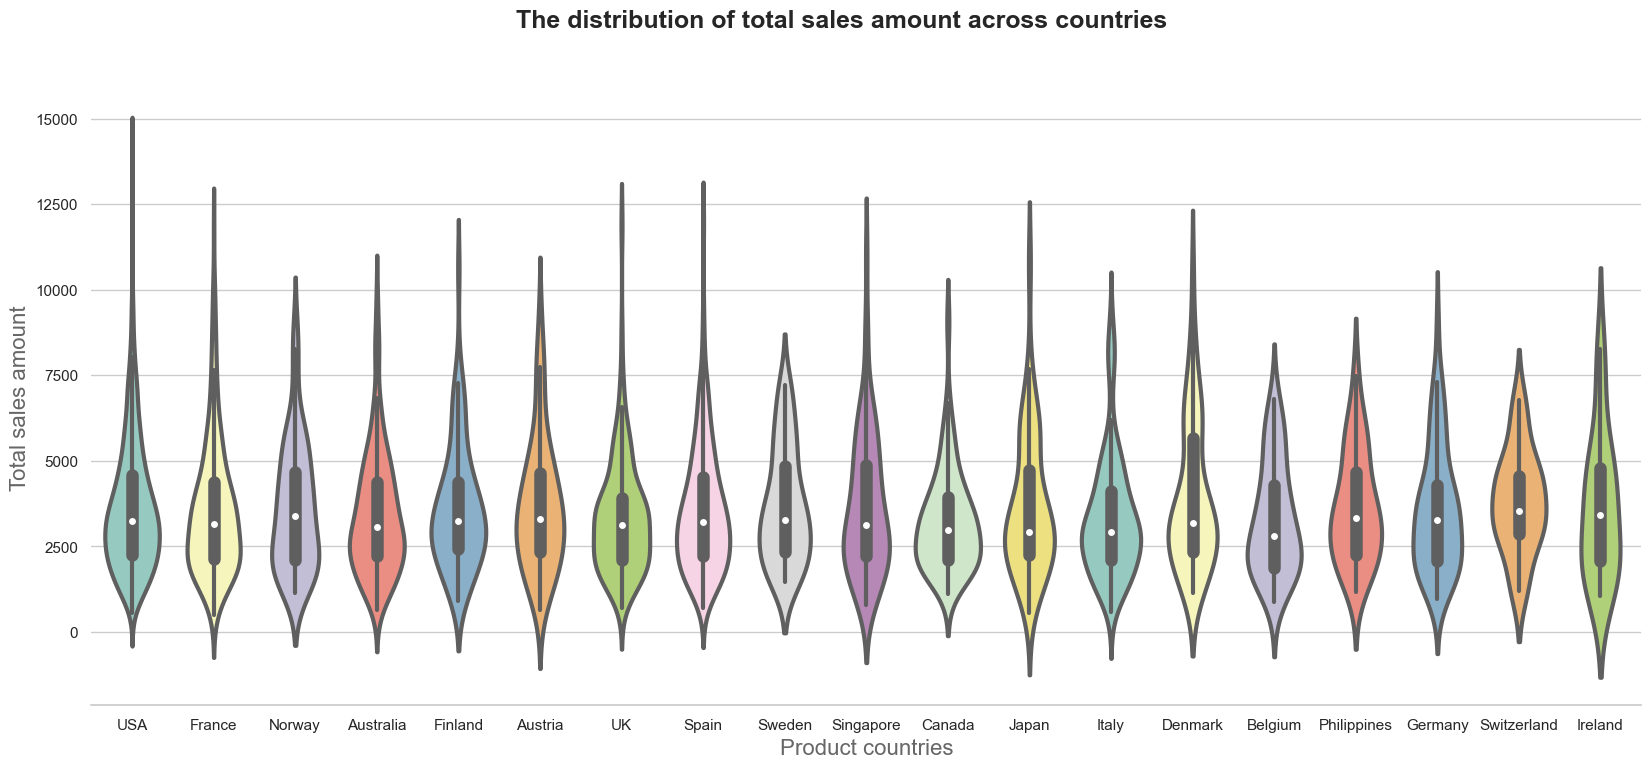

In [24]:
# Generate a violin plot 

sb.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 8))
sb.violinplot( x='COUNTRY',y='SALES',data=newdf2, inner="box", palette="Set3", cut=2, linewidth=3)
sb.despine(left=True)
f.suptitle('The distribution of total sales amount across countries', fontsize=18, fontweight='bold')
ax.set_xlabel("Product countries",size = 16,alpha=0.7)
ax.set_ylabel("Total sales amount",size = 16,alpha=0.7)


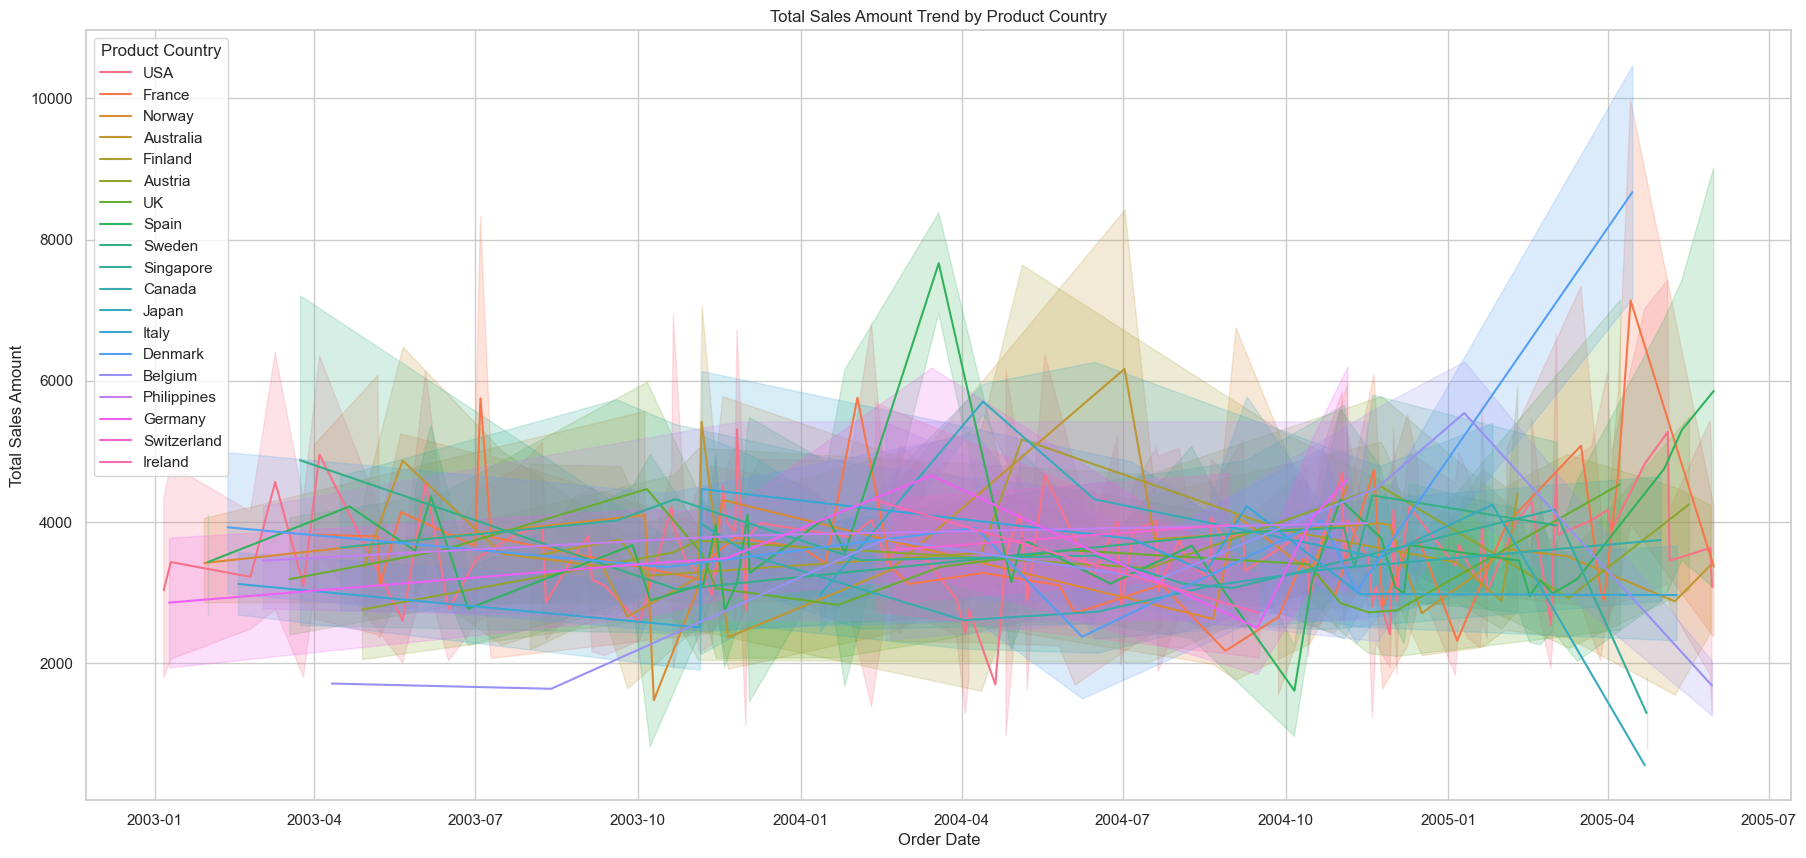

In [25]:
## part 9 :
# line plot
plt.figure(figsize=(22, 10))
sb.lineplot(x='ORDERDATE', y='SALES', hue='COUNTRY', data=newdf2)
plt.title('Total Sales Amount Trend by Product Country')
plt.xlabel('Order Date')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Country')
plt.show()


<Axes: title={'center': 'the sales concentrating'}>

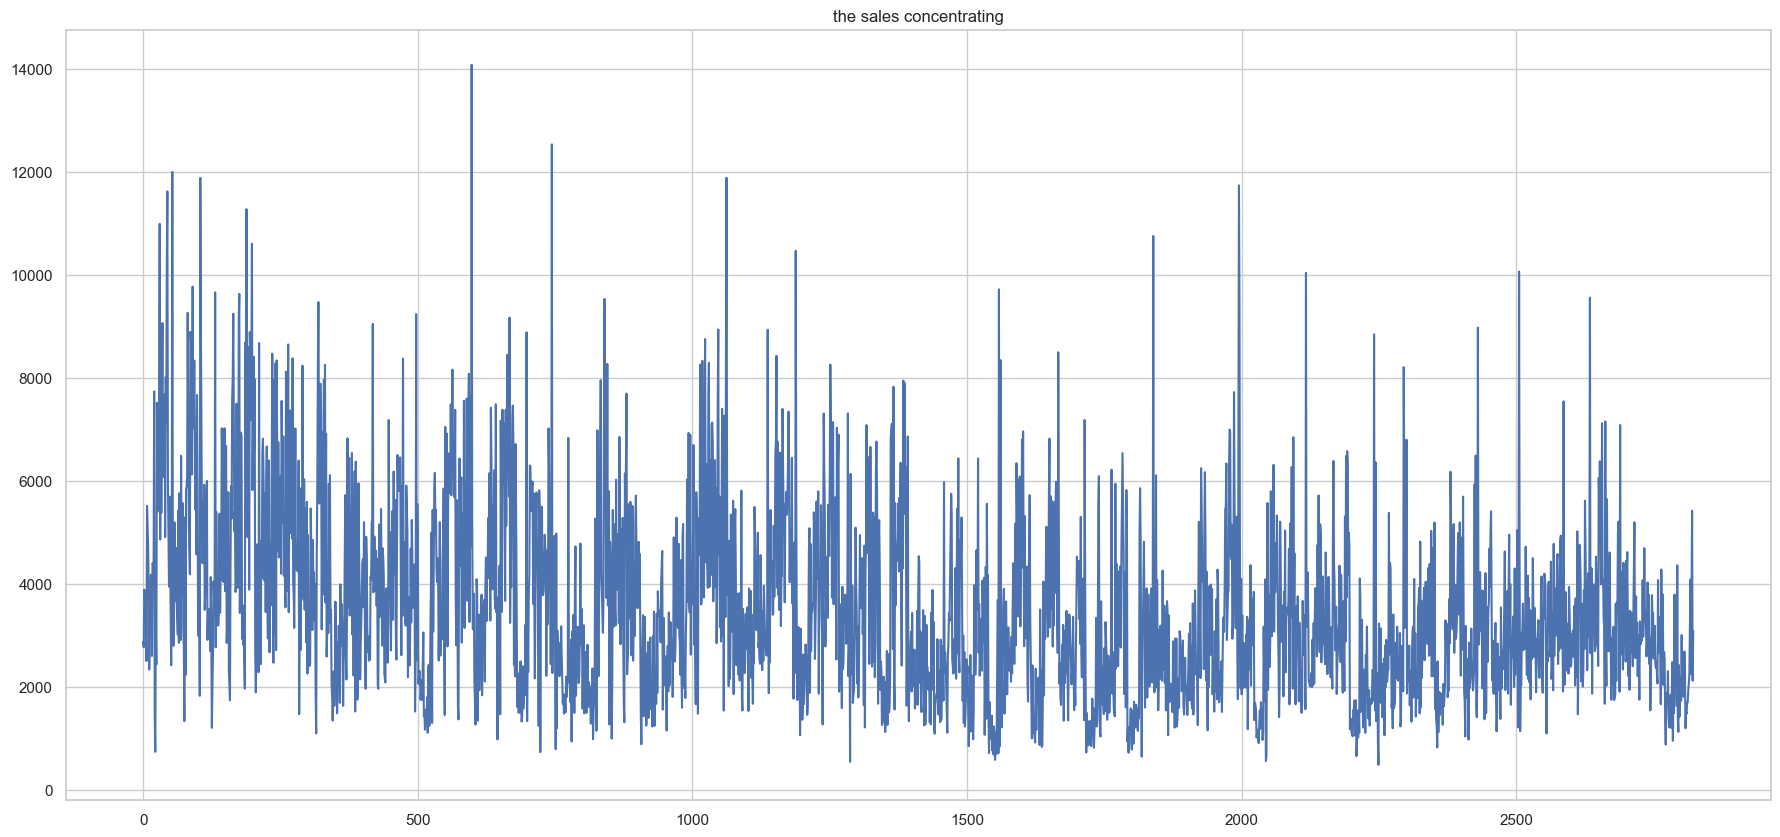

In [26]:
## part 10: Geographic Analysis
# A Geographical plot
plt.figure(figsize=(22, 10))
plt.title('the sales concentrating')
gdf = geopandas.GeoDataFrame(newdf2)
gdf['SALES'].plot()


c:\Users\Jullanar Sh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


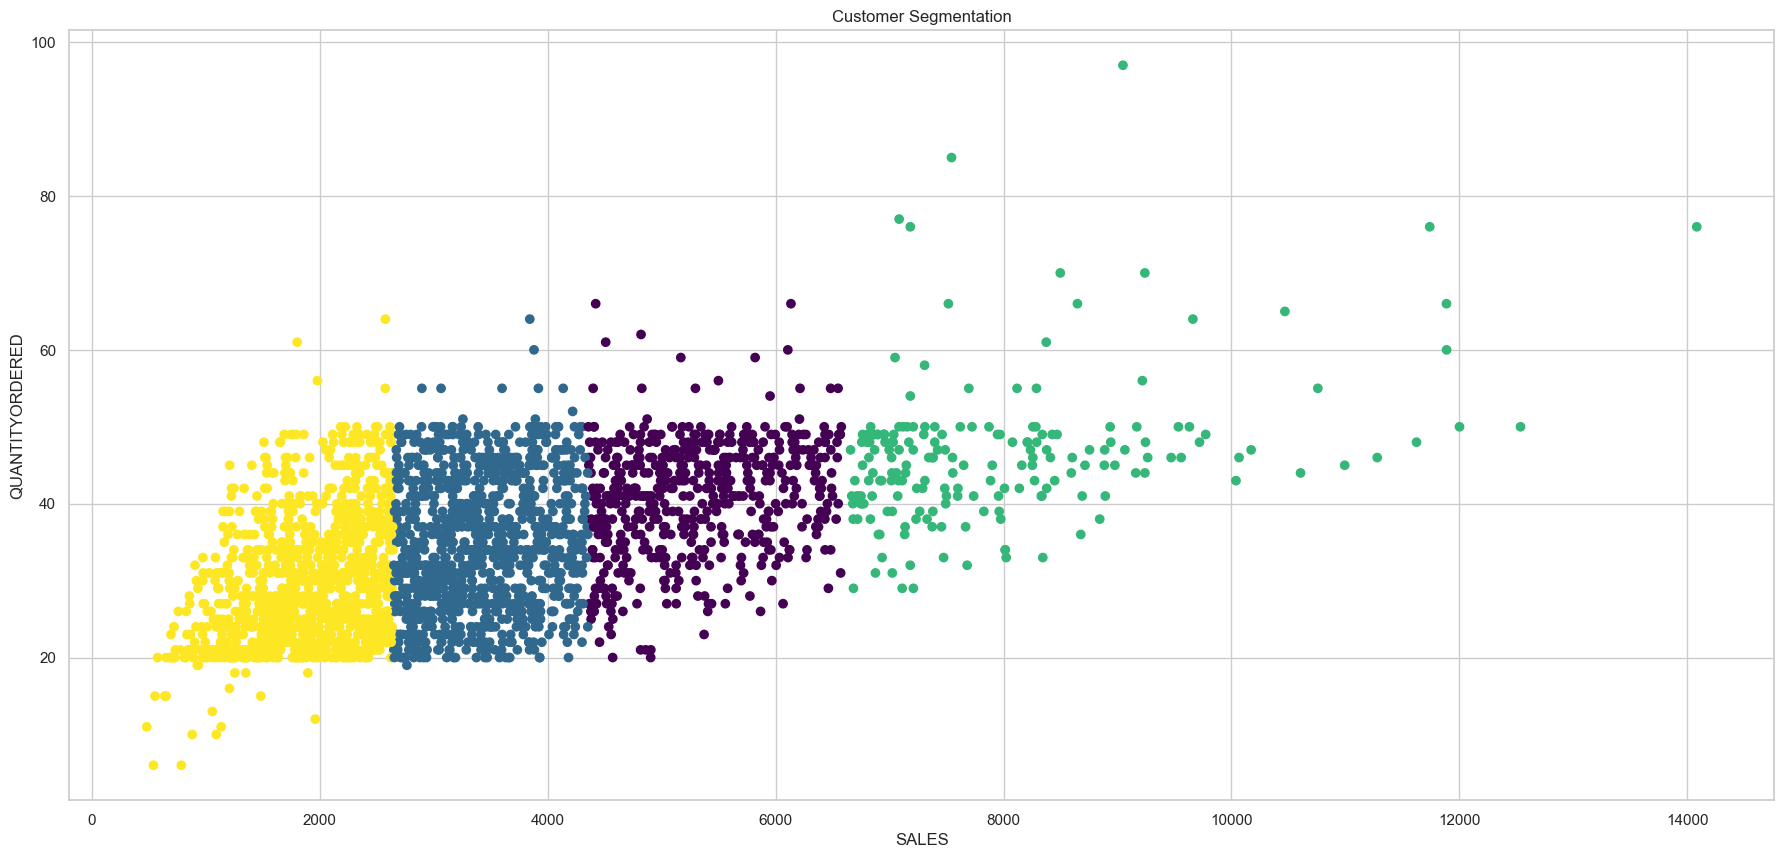

In [27]:
## part 11 : 
# Customer Segmentation

# Extract relevant features for clustering
X = newdf2[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

# Apply clustering algorithm
kmeans = KMeans(n_clusters=4)  # Choose the desired number of clusters
labels = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(22, 10))
plt.scatter(X['SALES'], X['QUANTITYORDERED'], c=labels, cmap='viridis')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('Customer Segmentation')
plt.show()

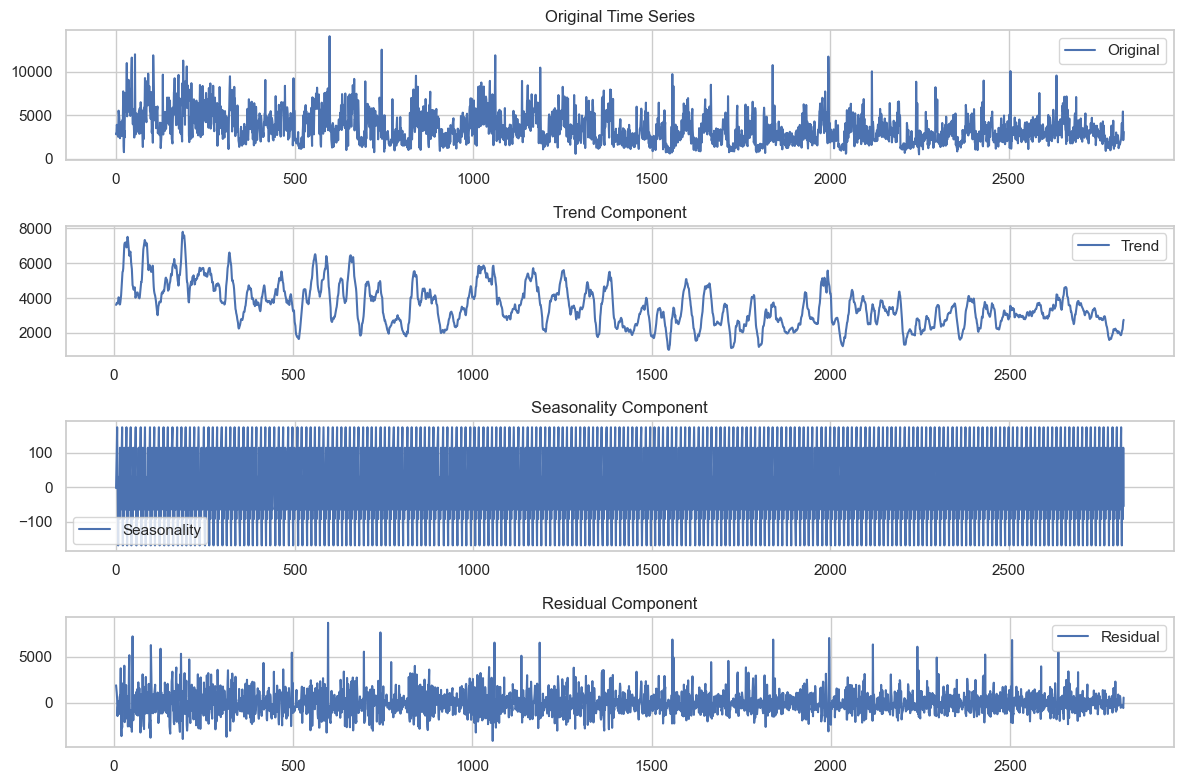

In [28]:
## part 12 :
# Perform time series decomposition
decomposition = seasonal_decompose(newdf2['SALES'], model='additive', period=12)

# Extract the trend, seasonality, and residual components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Visualize the components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(newdf2['SALES'], label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [29]:
## part 13 :

# Interactive Visualizations
# Create an interactive figure
fig = px.scatter(newdf2, x='ORDERDATE', y='SALES', color='COUNTRY')

# Add interactive features
fig.update_layout(
    title='Total Sales Amount by Time Period',
    xaxis=dict(title='Time Period'),
    yaxis=dict(title='Total Sales Amount'),
    hovermode='closest',
    updatemenus=[
        dict(
            type='buttons',
            direction='right',
            active=0,
            buttons=list([
                dict(
                    label='All',
                    method='update',
                    args=[{'visible': [True] * len(newdf2)}]
                ),
                dict(
                    label='Filter by Country',
                    method='update',
                    args=[{'visible':newdf2['COUNTRY'] == 'Selected_Country'}]  # Replace 'Selected_Country' with the desired country name
                ),
                dict(
                    label='Filter by Time Period',
                    method='update',
                    args=[{'visible':newdf2['ORDERDATE'] == 'Selected_Time_Period'}]  # Replace 'Selected_Time_Period' with the desired time period
                )
            ])
        )
    ]
)

# Show the interactive plot
fig

In [30]:
## part 14 : 

#  Comparing Trends
# Extract the year and month from the index
newdf2['YEAR_ID'] = pd.DatetimeIndex(newdf2.index).year
newdf2['MONTH'] = pd.DatetimeIndex(newdf2.index).month

# Group the data by year and month, and calculate the total sales
monthly_sales = newdf2.groupby(['YEAR_ID', 'Month'])['SALES'].sum().reset_index()

# Create a grouped bar plot
fig = px.bar(monthly_sales, x='Month', y='SALES', color='YEAR_ID', barmode='group')

# Customize the plot
fig.update_layout(
    title='Monthly Total Sales Amount by Year',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(title='Total Sales Amount'),
)

# Show the plot
fig.show()



C:\Users\Jullanar Sh\AppData\Local\Temp\ipykernel_7492\2329413910.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Jullanar Sh\AppData\Local\Temp\ipykernel_7492\2329413910.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

